# Statistics Sample 

A researcher needs your statistical expertise to evaluate an intervention. The six-month intervention was to give subjects a special exercise plan. The researcher randomized 2,500 people to the treatment group (which receives the intervention) and another 2,500 to the control group (does not receive the intervention). The physician wishes to evaluate the subjects’ health outcomes (weight and self-rated health) before the start of the intervention and immediately after the intervention. <br>
The physician wants to know whether the new exercise plan will affect one’s overall health (measured by change in weight and self-rated health) differently for those receiving the new exercise plan versus those not receiving the exercise plan.

$\textbf{Population:}$ Individuals who either receive the treatment or do not receive the treatment.<br>
$\textbf{Parameter of Interest:}$ WEIGHT_DIFF, SRH_DIFF

$\textbf{Data:}$ 5000 people were studied. 50% of those received treatment and 50% did not receive treatments.

# Research Questions: 

1. Create an analytic dataset by appropriately combining the 4 data files, and provide code for how you arrived at your analytic data set.  Describe your workflow.<br>
2. Explore and analyze the data as you see fit. Please show at least one plot.<br>
3. Explain what you did in #2 and tell us why you decided on that method. <br>
4. Explain the results to the investigator. Please assume the investigator has limited statistical knowledge. Tell her whether there is or is not a treatment effect and if so, how the two groups differ with respect to their weight profiles and SRH over time.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn.apionly as sns
plt.style.use('ggplot')
sns.set_style('ticks')
import matplotlib.ticker as ticker
from IPython.display import Image
import collections
from functools import reduce 
from functools import reduce
import numpy
import sys
import math

# Enable inline plotting  
%matplotlib inline

# Data Acquisition 

In [2]:
data1 = 'data1_age_sex_race.csv'
data2 = 'data2_SRH.csv'
data3a = 'data3a_weight_trt.csv'
data3b = 'data3b_weight_con.csv'

In [3]:
df1 = pd.read_csv(data1,delimiter=',')

In [4]:
df1 = df1['SexAge_Race'].str.split('_', n = 1, expand = True)

In [5]:
df1 = pd.concat([pd.Series(range(1,5001)),df1[0].str.split('(\d.*)', n = 1, expand = True).iloc[:,:2],df1[1]],axis=1)

In [6]:
df1.columns = ['ID','Sex','Age','Race']

In [7]:
df1['Age'] = df1['Age'].astype('float')

In [9]:
df1.head()

,ID,Sex,Age,Race
0,1,MALE,41.2,White
1,2,FEMALE,42.9,White
2,3,FEMALE,38.5,White
3,4,FEMALE,35.6,Hispanic
4,5,FEMALE,48.5,White


In [10]:
df2 = pd.read_csv(data2,delimiter=',')
df2.columns = ['ID','trt','TIME','SRH']

In [11]:
df2['POST_SRH'] = df2[df2['TIME']=='POST']['SRH']
df2['PRE_SRH'] = df2[df2['TIME']=='PRE']['SRH']
df2 = df2.drop(['TIME','SRH'],axis=1)

In [88]:
df2 = df2.groupby(by='ID',as_index='False').agg({'POST_SRH':'first',
                                                 'PRE_SRH':'first','trt':'first'}).reset_index()

In [13]:
df2.head()

,ID,PRE_SRH,POST_SRH,trt
0,1,Good,Poor,1
1,2,Poor,Very Poor,1
2,3,Satisfactory,Good,1
3,4,Poor,Good,1
4,5,Poor,Poor,1


In [14]:
df3a = pd.read_csv(data3a,delimiter=',')
df3a.columns = ['ID','PRE_WEIGHT','POST_WEIGHT']

In [15]:
df3a.head()

,ID,PRE_WEIGHT,POST_WEIGHT
0,1,135.2510,NaN
1,1,NaN,125.6678
2,2,154.8713,NaN
3,2,NaN,153.9882
4,3,128.1951,NaN


In [16]:
df3b = pd.read_csv(data3b,delimiter=',')
df3b.columns = ['ID','PRE_WEIGHT','POST_WEIGHT']

In [17]:
df3b.head()

,ID,PRE_WEIGHT,POST_WEIGHT
0,2501,159.7587,NaN
1,2501,NaN,158.692
2,2502,176.1611,NaN
3,2502,NaN,174.827
4,2503,181.3907,NaN


In [18]:
df3 = pd.merge(df3a,df3b,on=['ID','PRE_WEIGHT','POST_WEIGHT'],how='outer')

In [19]:
df3 = df3.groupby(by='ID',as_index='False').agg({'PRE_WEIGHT':'first','POST_WEIGHT':'first'}).reset_index()

In [20]:
df3.head()

,ID,POST_WEIGHT,PRE_WEIGHT
0,1,125.6678,135.2510
1,2,153.9882,154.8713
2,3,115.5969,128.1951
3,4,177.0187,183.4600
4,5,163.9262,166.3726


In [21]:
df_final = reduce(lambda x,y: pd.merge(x,y,on='ID',how='outer'),[df1,df2,df3])

# Data Preparation 

In [22]:
categorical_field_names = ['Sex','Race']
for c in categorical_field_names:
    df_final[c] = df_final[c].astype('category')
    
df_final['trt'] = df_final['trt'].astype('Int64')
df_final['Age'] = df_final['Age'].astype('float')
df_final['PRE_WEIGHT'] = df_final['PRE_WEIGHT'].astype('float')
df_final['POST_WEIGHT'] = df_final['POST_WEIGHT'].astype('float')

Here we calculate the weight difference in all the analysis instead of pre weight and post weight. Generally, negative weight difference is desired.

In [23]:
df_final['WEIGHT_DIFF'] = df_final['POST_WEIGHT']-df_final['PRE_WEIGHT']

In [24]:
df_final.head()

,ID,Sex,Age,Race,PRE_SRH,POST_SRH,trt,POST_WEIGHT,PRE_WEIGHT,WEIGHT_DIFF
0,1,MALE,41.2,White,Good,Poor,1,125.6678,135.2510,-9.5832
1,2,FEMALE,42.9,White,Poor,Very Poor,1,153.9882,154.8713,-0.8831
2,3,FEMALE,38.5,White,Satisfactory,Good,1,115.5969,128.1951,-12.5982
3,4,FEMALE,35.6,Hispanic,Poor,Good,1,177.0187,183.4600,-6.4413
4,5,FEMALE,48.5,White,Poor,Poor,1,163.9262,166.3726,-2.4464


## Generate summary statistics 

Create a summary of the all quantitaive parameters.

In [25]:
df_final.loc[:,['Age','POST_WEIGHT','PRE_WEIGHT','WEIGHT_DIFF']].describe()

,Age,POST_WEIGHT,PRE_WEIGHT,WEIGHT_DIFF
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,38.889920,154.967374,159.855089,-4.887715
std,7.926338,21.661830,21.596117,7.645269
min,18.100000,78.090870,82.803790,-38.801200
25%,33.400000,140.109450,145.126975,-9.103075
50%,38.800000,154.624650,159.113800,-1.969600
75%,44.100000,169.540225,174.384500,0.031925
max,69.300000,229.274700,242.763200,18.347900


Check to see if there are NANs in the final dataset.

In [26]:
np.where(df_final.isna()=='True')

(array([], dtype=int64), array([], dtype=int64))

## Label change for PRE_SRH and POST_SRH  

Post SRH and Pre SRH are categorical variables and in order to be able to analyze their effect. There are five levels for SRH including very poor, poor, satisfactory, good, excellent. We assign 1, 2, 3, 4, 5 to each level respectively. In addition, we consider SRH_diff instead of Post SRH and Pre SRH. Generally a positive SRH_diff is desired.

Check if there are any mislabeled item for both POST_SRH and PRE_SRH

In [27]:
np.where((df_final['POST_SRH'].apply(type)==str))

(array([   0,    1,    2, ..., 4997, 4998, 4999]),)

In [28]:
np.where((df_final['PRE_SRH'].apply(type)==str))

(array([   0,    1,    2, ..., 4997, 4998, 4999]),)

In [29]:
df_final.loc[df_final['POST_SRH']=='Excellent ','POST_SRH'] = 'Excellent'
df_final.loc[df_final['POST_SRH']=='Very  Poor','POST_SRH'] = 'Very Poor'
df_final.loc[df_final['PRE_SRH']=='Excellent ','PRE_SRH'] = 'Excellent'
df_final.loc[df_final['PRE_SRH']=='Very  Poor','PRE_SRH'] = 'Very Poor'

In [30]:
df_final.loc[df_final['POST_SRH']=='Very Poor','POST_SRH'] = 1
df_final.loc[df_final['POST_SRH']=='Poor','POST_SRH'] = 2
df_final.loc[df_final['POST_SRH']=='Satisfactory','POST_SRH'] = 3
df_final.loc[df_final['POST_SRH']=='Good','POST_SRH'] = 4
df_final.loc[df_final['POST_SRH']=='Excellent','POST_SRH'] = 5 

In [31]:
df_final.loc[df_final['PRE_SRH']=='Very Poor','PRE_SRH'] = 1
df_final.loc[df_final['PRE_SRH']=='Poor','PRE_SRH'] = 2
df_final.loc[df_final['PRE_SRH']=='Satisfactory','PRE_SRH'] = 3
df_final.loc[df_final['PRE_SRH']=='Good','PRE_SRH'] = 4
df_final.loc[df_final['PRE_SRH']=='Excellent','PRE_SRH'] = 5 

In [32]:
df_final['SRH_DIFF'] = df_final['POST_SRH']-df_final['PRE_SRH']

In [33]:
df_final.head()

,ID,Sex,Age,Race,PRE_SRH,POST_SRH,trt,POST_WEIGHT,PRE_WEIGHT,WEIGHT_DIFF,SRH_DIFF
0,1,MALE,41.2,White,4,2,1,125.6678,135.2510,-9.5832,-2
1,2,FEMALE,42.9,White,2,1,1,153.9882,154.8713,-0.8831,-1
2,3,FEMALE,38.5,White,3,4,1,115.5969,128.1951,-12.5982,1
3,4,FEMALE,35.6,Hispanic,2,4,1,177.0187,183.4600,-6.4413,2
4,5,FEMALE,48.5,White,2,2,1,163.9262,166.3726,-2.4464,0


# Data Visualization

## Check if we have a balanced dataset across males and females.

In [34]:
len(df_final[df_final['Sex']=='MALE'])

2444

In [35]:
len(df_final[df_final['Sex']=='FEMALE'])

2556

## Check the proportion of people from different races in the whole population.

In [36]:
df_Race = df_final.groupby(by=['Race','trt'],as_index='False').count()

In [37]:
df_Race = df_Race.reset_index()

In [38]:
df_Race = df_Race.set_index('Race')

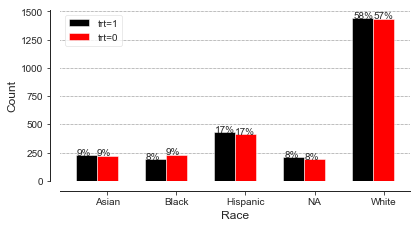

In [39]:
width = 0.3          # width of bar
x = np.arange(5)
rects1 = plt.bar(x,'ID',data=df_Race[df_Race['trt']==0], width=width, label='trt=1',color='k')
rects2 = plt.bar(x+width,'ID', data=df_Race[df_Race['trt']==1], width=width, label='trt=0',color='r')

plt.xticks([r + width for r in range(len(x))], ['Asian', 'Black', 'Hispanic', 'NA', 'White'])
plt.grid(which='major',linestyle=':', linewidth='0.5', axis='y', color='black')

for p in rects1:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    plt.text(x+0.01, y + height + 0.1,'{:.0%}'.format(height/2500))
    
for p in rects2:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    plt.text(x, y + height + 0.1,'{:.0%}'.format(height/2500))

plt.xlabel('Race')   
plt.ylabel('Count')
plt.legend(loc='upper left')
sns.despine(offset=10)

plt.style.use('ggplot')
sns.set_style('ticks')
plt.rcParams['font.size'] = 12
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.35)
# fig.savefig('{}.pdf'.format(fig_name), bbox_inches='tight')

## Boxplot for our quantitative variables.

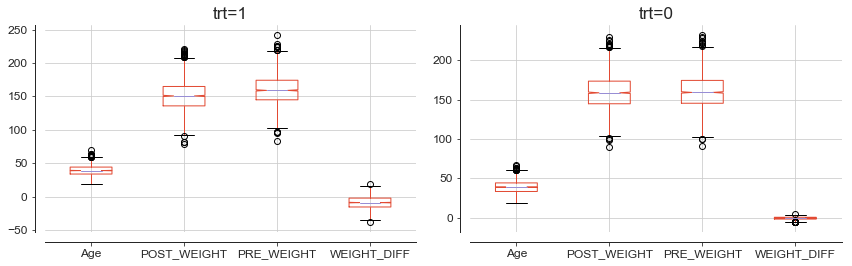

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
# The notches represent the confidence interval (CI) around the median.
ax[0] = df_final[df_final['trt']==1].boxplot(column=['Age','POST_WEIGHT','PRE_WEIGHT','WEIGHT_DIFF'],notch = True,rot=30,ax=ax[0])
ax[1] = df_final[df_final['trt']==0].boxplot(column=['Age','POST_WEIGHT','PRE_WEIGHT','WEIGHT_DIFF'],notch = True,rot=30,ax=ax[1])

ax[0].set_title('trt=1')
ax[1].set_title('trt=0')
sns.despine(offset=10)
plt.style.use('ggplot')
sns.set_style('ticks')
plt.rcParams['font.size'] = 12
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.45)
# fig.savefig('{}.pdf'.format(fig_name), bbox_inches='tight')

Based on the box plot showed for treatment and control groups, more than 75% of the population had a negative weight difference in treatment group. The standard deviation is very small for control group and the weight differences are very small and very close to zero.

## Histogram plot of weight difference for treatment and control group 

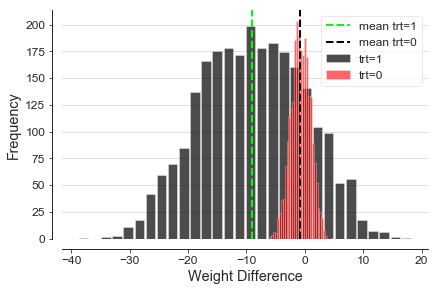

In [41]:
n, bins, patches = plt.hist(x=df_final[df_final['trt']==1]['WEIGHT_DIFF'], bins='auto', color='k',
                            alpha=0.7, rwidth=0.85, label='trt=1')
plt.axvline(x=df_final[df_final['trt']==1]['WEIGHT_DIFF'].mean(), color='lime', linestyle='dashed', linewidth=2, label='mean trt=1')

n, bins, patches = plt.hist(x=df_final[df_final['trt']==0]['WEIGHT_DIFF'], bins='auto', color='r',
                            alpha=0.6, rwidth=1.95, label='trt=0')
plt.axvline(x=df_final[df_final['trt']==0]['WEIGHT_DIFF'].mean(), color='k', linestyle='dashed', linewidth=2, label='mean trt=0')

sns.despine(offset=10)
plt.style.use('ggplot')
sns.set_style('ticks')
plt.rcParams['font.size'] = 12
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.15)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Weight Difference')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

It seems that the population for both treatment and control groups are $\textbf{normally distributed}$. 

## Histogram plot of SRH difference for treatment and control group 

Text(6.375, 0.5, 'Frequency')

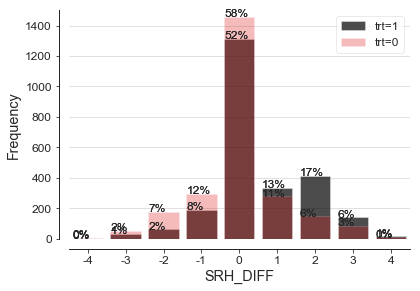

In [47]:
rects1 = sns.countplot(df_final[df_final['trt']==1]['SRH_DIFF'], color='k',alpha=0.7,label='trt=1')
rects2 = sns.countplot(df_final[df_final['trt']==0]['SRH_DIFF'], color='r',alpha=0.3,label='trt=0')

for p in rects1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    plt.text(x, y + height - 0.01,'{:.0%}'.format(height/2500))
    
for p in rects2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    plt.text(x, y + height + 0.01,'{:.0%}'.format(height/2500))


plt.ylim([0,1500])
sns.despine(offset=10)
plt.legend(loc='upper right')

plt.style.use('ggplot')
sns.set_style('ticks')
plt.rcParams['font.size'] = 12
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.15)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('SRH_DIFF')
plt.ylabel('Frequency')

Histogram of SRH_DIFF shows the degree of improvement (positive values) and deterioration (negative values) and their percentages for both control and treatment groups. (Zero means there has been no difference in SRH before and after the treatment.)

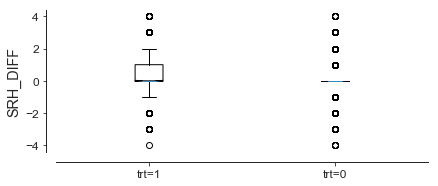

In [48]:
df = [df_final[df_final['trt']==1]['SRH_DIFF'],df_final[df_final['trt']==0]['SRH_DIFF']]
plt.boxplot(df,notch = True)
sns.despine(offset=10)
plt.style.use('ggplot')
sns.set_style('ticks')
plt.rcParams['font.size'] = 12
plt.tight_layout()
plt.ylabel('SRH_DIFF')
plt.gcf().subplots_adjust(bottom=0.45)
labels = ('trt=1','trt=0')
plt.xticks(np.arange(len(labels))+1,labels)
plt.show()
# fig = ax.get_figure()
# fig.savefig('{}.pdf'.format(fig_name), bbox_inches='tight')

# Hypothesis Testing: P value, confidence interval and effect size

$\textbf{Null Hypothesis:}$ $H_0$ <br>
$\textbf{Alternative Hypthosis:}$ $H_1$

Results of Null Hypothesis Significance Testing (NHST) only inform us of statistical significance without providing any information on the magnitude of the treatment effect. To readers who want to obtain information about the treatment, it is not useful to describe the expected results as “significant”. Effect size is the standardized way of measuring the treatment effect. <br>
There are many kinds of the effect sizes. Most prominently, Cohen’s d is one of the acclaimed effect sizes, Pearson’s correlation coefficient r, and odds ratio are also types of effect sizes [1].

# Effect Size Using Correlation Test (Control Group)

In [49]:
from scipy.stats import spearmanr, pearsonr

In [50]:
corr, p = pearsonr(df_final[df_final['trt']==0]['SRH_DIFF'], df_final[df_final['trt']==0]['WEIGHT_DIFF'])

In [51]:
corr

-0.02334500506419921

In [52]:
p

0.24328084635268588

## Statistically Significant Correlations 

$\textbf{Note}$: the following calculations are in addition to the p-value obtained using spearmanr in scipy.stat library.

$\textbf{$H_0$}: \rho=0$.<br>
$\textbf{$H_1$}: \rho\neq0$.

$t = (r)\sqrt{\frac{N-2}{1-r^2}}$

Where: r is sample correlation and $\rho$ is the hypothesized correlation.

In [53]:
df = 2498 # Degrees of freedom

In [54]:
t = abs(corr)*math.sqrt((2500-2)/(1-corr**2))

In [55]:
t

1.1671013318801213

To see whether this t value is statistically significant, we must look at the table of t values in Critical Values of The t Distributions. There we can see that, because our degrees of freedom equals 2498, we must look at t values in both the $df=\infty$ row. Looking at the $df=\infty$ row, we can see that a t value of 9.46 has a probability of greater than .2 (for a two-tailed test).<br> 
Therefore, we conclude that our p value is greater than 0.2. If our alpha level is the traditional .05, we would conclude that our correlation coefficient is not statistically significant. We could say that, “We failed to find a significant relationship between WEIGHT_DIFF and SRH_DIFF (r = -0.025, t(2498) = 1.23, p > 0.2) when there is no treatment.”

# Effect Size Using Correlation Test (Treatment Group)

In [56]:
corr, p = pearsonr(df_final[df_final['trt']==1]['SRH_DIFF'], df_final[df_final['trt']==1]['WEIGHT_DIFF'])

In [57]:
corr

-0.17445300026677135

In [58]:
p

1.5533971758053816e-18

In [59]:
spearmanr(df_final[df_final['trt']==1]['SRH_DIFF'], df_final[df_final['trt']==1]['WEIGHT_DIFF'])

SpearmanrResult(correlation=-0.1858816097331168, pvalue=7.170243680140726e-21)

## Statistically Significant Correlations 

$\textbf{Note}$: the following calculations are in addition to the p-value obtained using spearmanr in scipy.stat library.

$\textbf{$H_0$}: \rho=0$.<br>
$\textbf{$H_1$}: \rho\neq0$.

$t = (r)\sqrt{\frac{N-2}{1-r^2}}$

Where: r is sample correlation and $\rho$ is the hypothesized correlation.

In [60]:
t = abs(corr)*math.sqrt((2500-2)/(1-corr**2))

In [61]:
df = 2498 # Degrees of freedom

In [62]:
t

8.85494641390509

To see whether this t value is statistically significant, we must look at the table of t values in Critical Values of The t Distributions. There we can see that, because our degrees of freedom equals 2498, we must look at t values in both the $df=\infty$ row. Looking at the $df=\infty$ row, we can see that a t value of 9.46 has a probability of much less than 0.001 (for a two-tailed test).<br> 
Therefore, we conclude that our p value is less than 0.001. If our alpha level is the traditional 0.05, we would conclude that our correlation coefficient is statistically significant. We could say that, “We found a significant relationship between between WEIGHT_DIFF and SRH_DIFF
(r = -0.186, t(2498) = 9.46, p << 0.001) when there is treatment.”

# Effect Size Using Cohen's d

## Weight Difference

### Effect Size 

In [69]:
from numpy import std, mean, sqrt
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (mean(x) - mean(y)) / sqrt((std(x, ddof=1) ** 2 + std(y, ddof=1) ** 2) / 2.0) 
    # numpy's standard deviation default behaviour is to divide by n, whereas with ddof=1 it will divide by n-1.

In [70]:
d = cohen_d(df_final[df_final['trt']==1]['WEIGHT_DIFF'],df_final[df_final['trt']==0]['WEIGHT_DIFF'])

In [71]:
d

-1.2770673016757919

The larger the Cohen's d value, the further sample means are from one another in standard deviation units. <br> 
Here, the effect size is very LARGE. <br>
This means that about 88.5% samples of the treatment group would be below the mean of control group. 
Cohen's d is for the comparison of two independent groups from a continuous variable.

### CI of effect size 

Confidence intervals may be applied to quantify the error imposed on an effect size. <br>
Hedge and Olkin [2] provided a formula for estimating CI for effect size, subject to the condition of normal distribution.

$\sigma(d) = \sqrt{\frac{N_1+N_2}{N_1\times N_2}+\frac{d^2}{2(N_1+N_2)}}$

95% CI for Cohen’s d: $[d − 1.96 \times \sigma(d), d + 1.96 \times \sigma(d)]$

In [72]:
def sigma_d(x,y,d):
    nx = len(x)
    ny = len(y)
    return sqrt((nx+ny)/(nx*ny)+d**2/(2*(nx+ny))) 

In [73]:
sigma = sigma_d(df_final[df_final['trt']==1]['WEIGHT_DIFF'],df_final[df_final['trt']==0]['WEIGHT_DIFF'],d)

#### 95% CI for Cohen’s d

In [74]:
[d-1.96*sigma,d+1.96*sigma]

[-1.3378933395794603, -1.2162412637721234]

we need to express the degree of uncertainty present in the estimation of effect size, that is, the bigger the trial, the more precise the point estimate will be. We do this uncertainty estimation using 95% CI. <br>
These relatively tight CIs, provides strong evidence that the treatment causes weight loss. 

### Statistical Power

statistical power is the probability that a test will correctly reject a false null hypothesis. Statistical power has relevance only when the NULL is FALSE. <br>
The higher the statistical power for a given experiment, the lower the probability of making a Type II (false negative) error. That is the higher the probability of detecting an effect when there is an effect [3]. 

In [75]:
# estimate sample size via power analysis
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect = 0.885
alpha = 0.05
power = 0.8
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 21.047


Running the example calculates and prints the estimated number of samples for the experiment
as 21. This would be a suggested minimum number of samples required to see an effect of
the desired size.

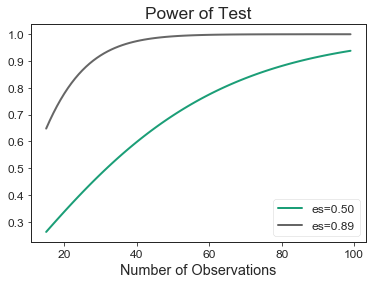

In [76]:
# parameters for power analysis
effect_size = np.array([0.5,0.885])
sample_sizes = np.array(range(15, 100))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_size)
plt.show()

## Effect Size Using Odd Ratio 

## SRH Difference 

### Contingency Table

Numeber of people who received treatment and had a POSITIVE evaluation of their health: 

In [77]:
len(np.where(df_final[df_final['trt']==1]['SRH_DIFF']>0)[0])

906

Numeber of people who received treatment and had a NEGATIVE evaluation of their health: 

In [78]:
len(np.where(df_final[df_final['trt']==1]['SRH_DIFF']<0)[0])

283

Numeber of people who DID NOT receive treatment and had a POSITIVE evaluation of their health: 

In [79]:
len(np.where(df_final[df_final['trt']==0]['SRH_DIFF']>0)[0])

515

Numeber of people who DID NOT receive treatment and had a NEGATIVE evaluation of their health: 

In [80]:
len(np.where(df_final[df_final['trt']==0]['SRH_DIFF']<0)[0])

528

In [81]:
Contingency_table = pd.DataFrame({'Event(+)':[906,515],'Event(-)':[283,528]},index=['Treatment','Control'])

In [82]:
Contingency_table

,Event(+),Event(-)
Treatment,906,283
Control,515,528


### Effect Size for Contingency Table: Odd Ratio (OR)

$OR = \frac{a/b}{c/d}$

In [83]:
OR = (906/283)/(515/528)

In [84]:
OR

3.282225805344952

$se(log[OR]) = \sqrt{\frac{1}{a}+\frac{1}{b}+\frac{1}{c}+\frac{1}{d}}$

$EF = e^{1.96\times se(log[OR])}$

In [85]:
EF = math.exp(1.96*sqrt(1./906+1./283+1./515+1./528))

In [86]:
EF

1.1977154324752266

#### 95% CI for OR Effect Size:

95% CI of OR: $[OR.EF^{–1}, OR.EF^{+1}]$

In [87]:
[OR*EF**(-1),OR*EF]

[2.7404053720522144, 3.9311724999300783]

Again, here, the effect size is very LARGE. <br>
These relatively tight CIs, provides strong evidence that the treatment is effective.

# What-If Scenarios (brief responses)--

## What if the investigator wanted to evaluate 16 additional outcomes (in addition to weight and SRH)? She is curious to see if the exercise regime has an impact on body fat %, mental well-being, bone density, etc... She intends to publish the results in a high-impact journal. How would you respond to this?  

She has to perform the measurments for all the other 16 parameters that she wants to involve in outcomes. Also, in this type of study, we cannot randomize individuals to treatment and control group. Furthermore, other covariates could be related to both the main covariate and the response [4].

## What if the two groups (treatment and control) were not randomized? How might you evaluate the intervention now? What additional information might you require, and which methods could you use? What would be your limitations? 

It’s well known that randomized trials are some of the most efficient ways to make causal inferences and to determine how much something (an intervention) differs from the comparator (some sort of control). Random assignment helps make these goals easier by minimizing selection bias (skewing of results) and making the distribution of prognostic factors between groups random (not balanced).<br>
In designing a randomized study, we want to be able to detect a clinically important effect on the new treatment versus the control group. Patients are randomized to one of the two treatments; sample size calculations for such a study can be done by using standard theory with the normal distribution and are found in most introductory statistical text-books [4].<br>
In some cases, randomization is not feasible due to physical constraints, ethical issues or resource limitations. This leads to observational  studies, whereby due to the presence of confounding variables, it is not appropriate to apply univariable comparison tests due to potential bias. The relationship between the main covariate and other covariates needs to be taken into account when calculating the necessary sample size for detecting a treatment effect. Consequently, sample size calculations in such studies are more complex. In some cases, analyses are based on large clinical(or administrative) registries. These can be very large, meaning that there is little concern about power. However, it is then important to consider whether the adjusted effect size is ‘clinically’ significant, regardless of ‘statistical’ significance. Another issue frequently encountered with non-randomized studies, particularly observational data studies, is the presence of missing data. In some cases, this can be substantial.<br> 
A standard approach for adjusting for confounding is multi-variable regression. In such models, we are typically interested in a single covariate (e.g. a binary treatment effect) and will include other covariates (i.e. the confounders) in the regression model. For multivariable  linear regression, one approach is to apply a correction factor to the approximate formula [5]. 

# References

[1] Lee, D.K., Alternatives to P value: confidence interval and effect size. Korean Journal of Anesthesiology, VOL. 69, NO. 6, 2016.<br>
[2] Hedge LV, Olkin I. Statistical methods for meta-analysis. Orlando, Academic Press Inc. 2014, p 86.<br>
[3] Brownlee J, Statistical Methods for Machine Learning Discover how to Transform Data into Knowledge with Python 2019.<br>
[4] Lipsitz  S,  Parzen  M.  Sample  size  calculations  for  non-randomized  stud-ies. Statistician 1995;44:81–90.<br>
[5] Hickey GL, Grant SW, Dunning J, Siepe M. Statistical primer: sample size and power calculations—why, when and how? Eur J Cardiothorac Surg 2018;54:4–9.